Hunter Bennett  
Glass Lab  
DESeq investigation of LXR RNA Seq Data  
Created 180201 | Last updated 180201
_____
The goal of this analysis is to explore the LXR KO RNASeq data and try to understand why we return so few differential peaks when we analyze it with DESeq2

In [2]:
# load DESeq2
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Warning message:


In [3]:
# load in files prepared by python worklflow in the notebook 180103_ATAC_DiffPeaks
outdir = '/home/h1bennet/LXR/results/180131_RNA/'
col_data = read.csv(paste0(outdir, 'deseq_coldata.txt'), sep='\t')
gene_counts = read.csv(paste0(outdir, 'rnaseq_matrix_condenseGenes_exons_raw_deseq.txt'), sep='\t', row.names=1)

In [4]:
# remove gene column from gene counts
gene_mat = gene_counts[, -ncol(gene_counts)]

In [5]:
# set baseline levels for the categories we will use in our model
col_data$genotype <- relevel(col_data$genotype, ref='C57BL6')


In [6]:
col_data

X,subject,sample_type,path,batch,genotype,cells,cage,group,group_unique
0,LXRaKObWT_Kupffer_RNA_polyA_NoTx_LXR623M_JSS_TDT_16_09_08,kupffer,/data/mm10/Kupffer/RNA/LXRaKObWT_Kupffer_RNA_polyA_NoTx_LXR623M_JSS_TDT_16_09_08,0,LXRaKO,Pooled,LXR623M,LXRaKO_Pooled,LXRaKO_Pooled_LXR623M
1,LXRaKObWT_Kupffer_RNA_polyA_NoTx_LXR642F_JSS_TDT_16_09_08,kupffer,/data/mm10/Kupffer/RNA/LXRaKObWT_Kupffer_RNA_polyA_NoTx_LXR642F_JSS_TDT_16_09_08,0,LXRaKO,Pooled,LXR642F,LXRaKO_Pooled,LXRaKO_Pooled_LXR642F
2,LXRaKO_M_KupfferTim4Neg_RNA_polyA_NoTx_LX11pool_JSS_TDT_20170916,kupffer,/data/mm10/Kupffer/RNA/LXRaKO_M_KupfferTim4Neg_RNA_polyA_NoTx_LX11pool_JSS_TDT_20170916,1,LXRaKO,Tim4Neg,LX11,LXRaKO_Tim4Neg,LXRaKO_Tim4Neg_LX11
3,LXRaKO_M_KupfferTim4Neg_RNA_polyA_NoTx_LX6pool_JSS_TDT_20170916,kupffer,/data/mm10/Kupffer/RNA/LXRaKO_M_KupfferTim4Neg_RNA_polyA_NoTx_LX6pool_JSS_TDT_20170916,1,LXRaKO,Tim4Neg,LX6,LXRaKO_Tim4Neg,LXRaKO_Tim4Neg_LX6
4,LXRaKO_M_KupfferTim4Pos_RNA_polyA_NoTx_LX11pool_JSS_TDT_20170916,kupffer,/data/mm10/Kupffer/RNA/LXRaKO_M_KupfferTim4Pos_RNA_polyA_NoTx_LX11pool_JSS_TDT_20170916,1,LXRaKO,Tim4Pos,LX11,LXRaKO_Tim4Pos,LXRaKO_Tim4Pos_LX11
5,LXRaKO_M_KupfferTim4Pos_RNA_polyA_NoTx_LX6pool_JSS_TDT_20170916,kupffer,/data/mm10/Kupffer/RNA/LXRaKO_M_KupfferTim4Pos_RNA_polyA_NoTx_LX6pool_JSS_TDT_20170916,1,LXRaKO,Tim4Pos,LX6,LXRaKO_Tim4Pos,LXRaKO_Tim4Pos_LX6
6,LXRDKO_Kupffer_RNA_polyA_NoTx_LXR626F_JSS_TDT_16_09_08,kupffer,/data/mm10/Kupffer/RNA/LXRDKO_Kupffer_RNA_polyA_NoTx_LXR626F_JSS_TDT_16_09_08,0,LXRDKO,Pooled,LXR626F,LXRDKO_Pooled,LXRDKO_Pooled_LXR626F
7,LXRDKO_Kupffer_RNA_polyA_NoTx_LXR632M_JSS_TDT_16_09_08,kupffer,/data/mm10/Kupffer/RNA/LXRDKO_Kupffer_RNA_polyA_NoTx_LXR632M_JSS_TDT_16_09_08,0,LXRDKO,Pooled,LXR632M,LXRDKO_Pooled,LXRDKO_Pooled_LXR632M
8,NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13,kupffer,/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN246cM_JSS_TDT_17_01_13,2,C57BL6,Tim4Pos,LN246cM,C57BL6_Tim4Pos,C57BL6_Tim4Pos_LN246cM
9,NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13,kupffer,/data/mm10/Kupffer/RNA/NCoRWT_Tim4PosKupffer_RNA_polyA_ControlDiet_6week_LN247aM_JSS_TDT_17_01_13,2,C57BL6,Tim4Pos,LN247aM,C57BL6_Tim4Pos,C57BL6_Tim4Pos_LN247aM


### Run DESeq analysis with interaction term model

In [7]:
dds <- DESeqDataSetFromMatrix(countData = gene_mat,
                             colData = col_data,
                             design = ~group)

converting counts to integer mode


In [8]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


### Lets look at the mean-variance relationship in the data

In [52]:
vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)

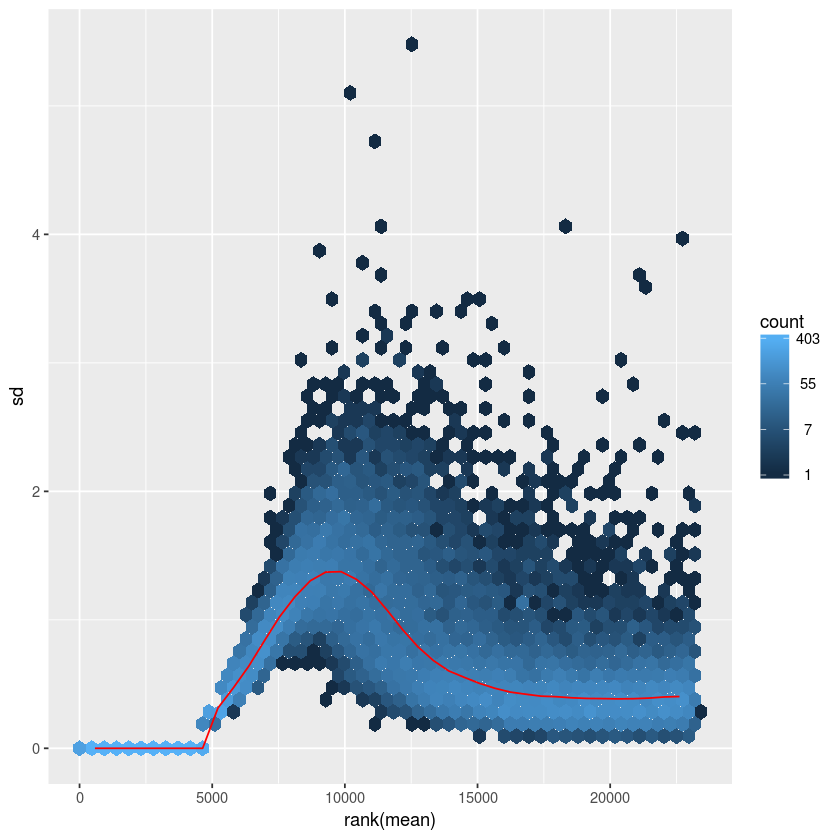

In [53]:
# this gives log2(n + 1)
ntd <- normTransform(dds)
library("vsn")
meanSdPlot(assay(ntd))

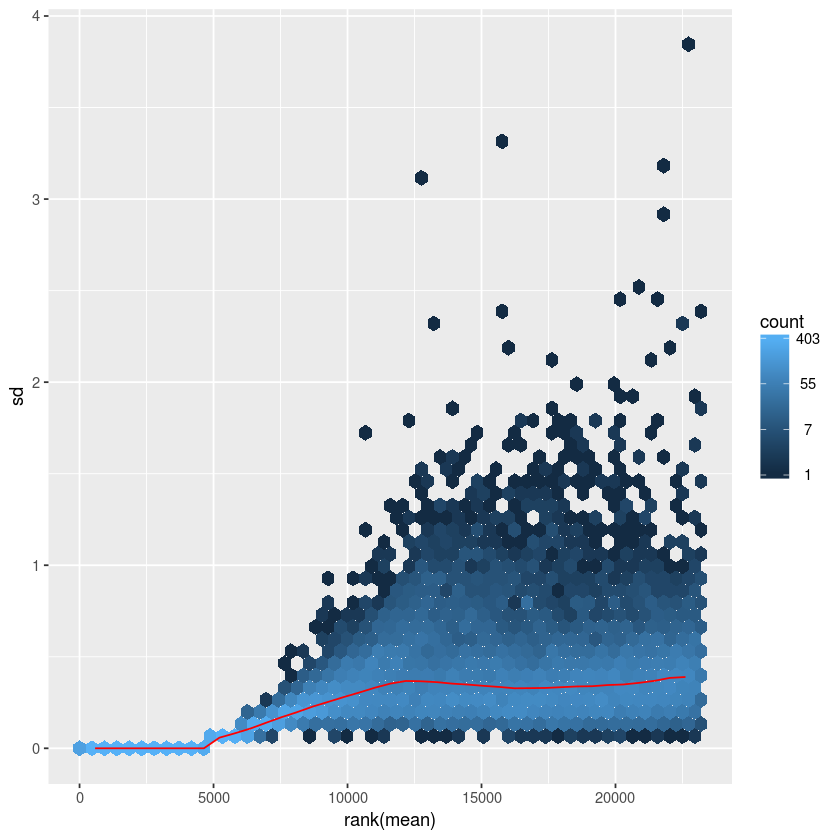

In [54]:
meanSdPlot(assay(vsd))

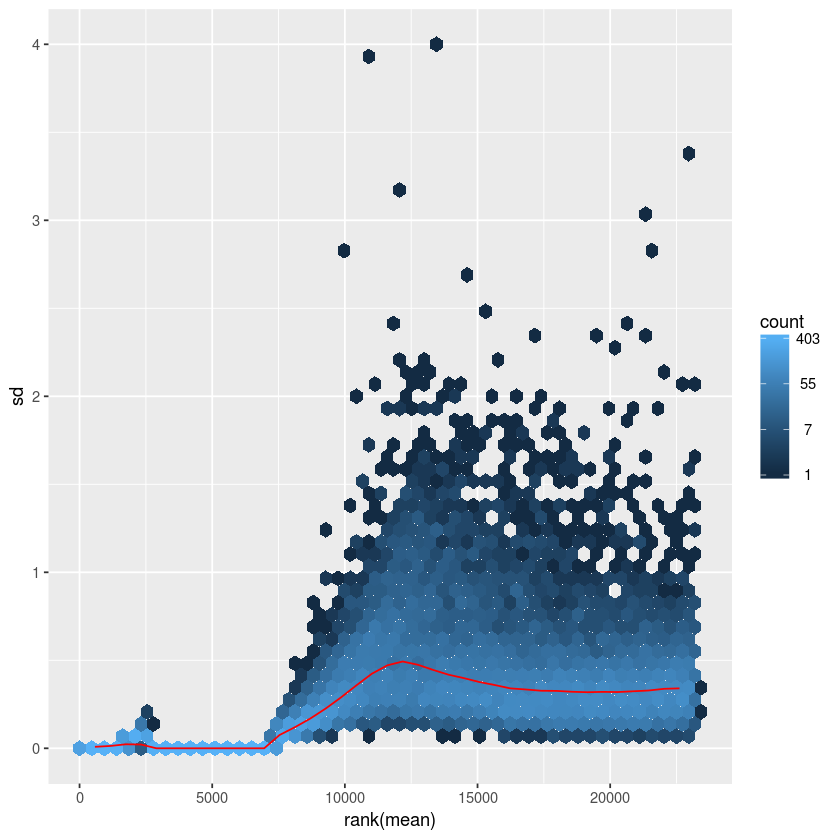

In [55]:
meanSdPlot(assay(rld))

### Lets take a look at the sample distances...

In [56]:
sampleDists <- dist(t(assay(vsd)))

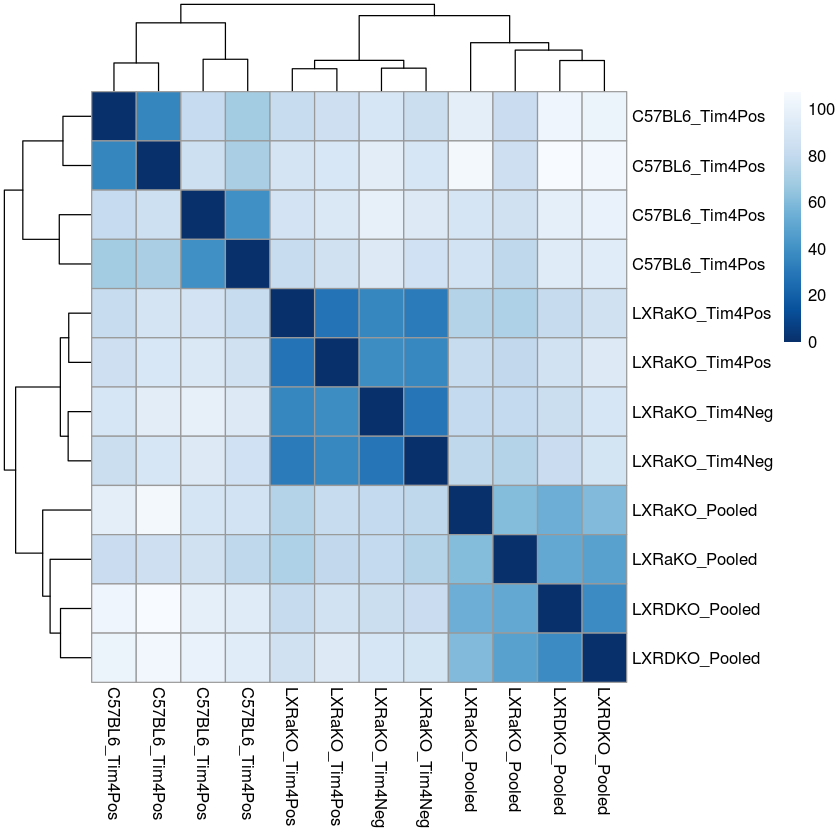

In [57]:
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- vsd$group
colnames(sampleDistMatrix) <- vsd$group
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

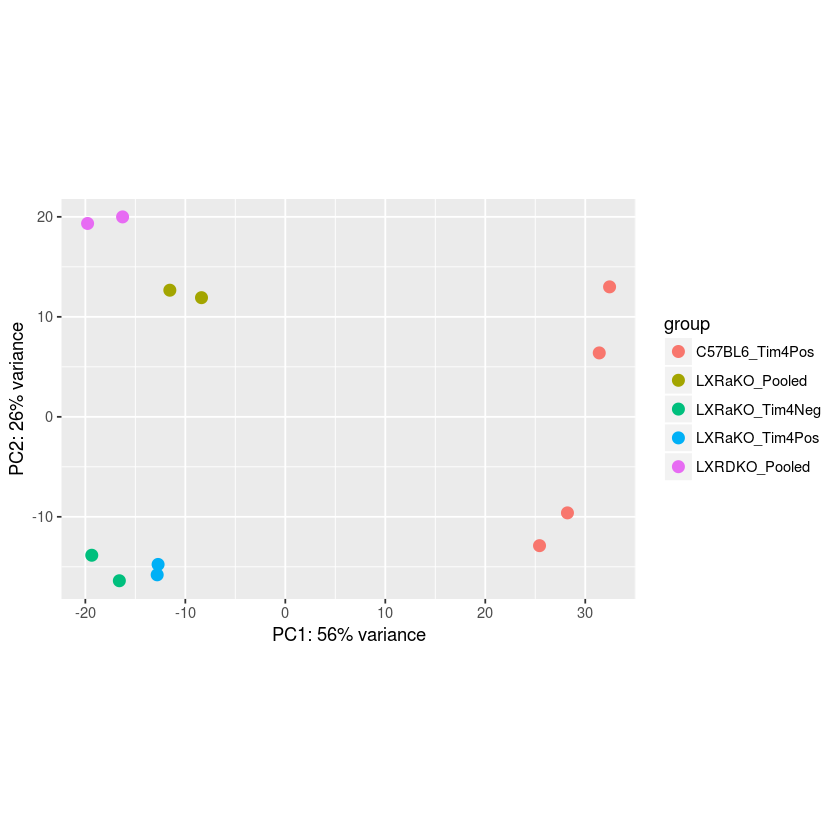

In [58]:
plotPCA(vsd, intgroup=c("group"))


### Now we will do a differential gene analysis

In [27]:
# diet effect for ncorwt
res <- results(dds, contrast=c('group', 'LXRaKO_Tim4Pos', 'C57BL6_Tim4Pos'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Pos_Deseq_results.txt"), sep='\t')

In [28]:
summary(res)


out of 18419 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 2021, 11% 
LFC < 0 (down)   : 2439, 13% 
outliers [1]     : 16, 0.087% 
low counts [2]   : 3875, 21% 
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



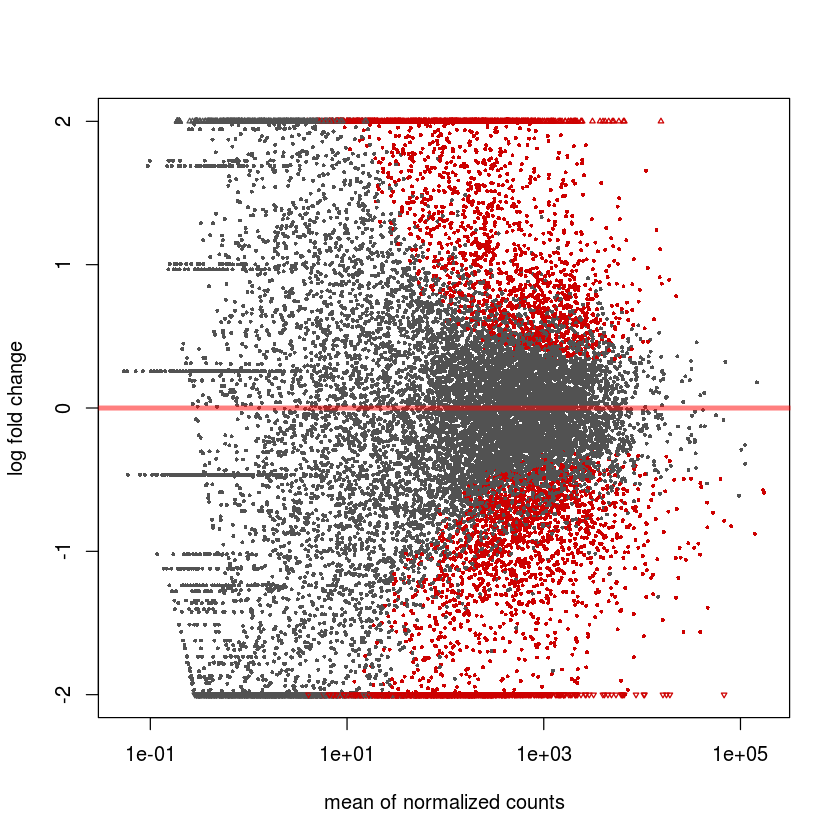

In [29]:
plotMA(res, ylim=c(-2,2))

In [30]:
# diet effect for ncorwt
res <- results(dds, contrast=c('group', 'LXRaKO_Tim4Neg', 'C57BL6_Tim4Pos'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4Neg_Deseq_results.txt"), sep='\t')

In [31]:
summary(res)


out of 18419 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 2049, 11% 
LFC < 0 (down)   : 2540, 14% 
outliers [1]     : 16, 0.087% 
low counts [2]   : 3170, 17% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [32]:
# diet effect for ncorwt
res <- results(dds, contrast=c('group', 'LXRaKO_Tim4Pos', 'LXRaKO_Tim4Neg'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXRaKO_Tim4PosvsNeg_Deseq_results.txt"), sep='\t')

In [33]:
summary(res)


out of 18419 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 37, 0.2% 
LFC < 0 (down)   : 17, 0.092% 
outliers [1]     : 16, 0.087% 
low counts [2]   : 4930, 27% 
(mean count < 10)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [34]:
# LXRDKO knockout
res <- results(dds, contrast=c('group', 'LXRDKO_Pooled', 'C57BL6_Tim4Pos'), alpha = 0.1)
res_ordered <- res[order(res$padj), ]
write.table(res_ordered, file = paste0(outdir, "LXR_DKO_Deseq_results.txt"), sep='\t')

In [37]:
summary(res)


out of 18419 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 2676, 15% 
LFC < 0 (down)   : 2792, 15% 
outliers [1]     : 16, 0.087% 
low counts [2]   : 2466, 13% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



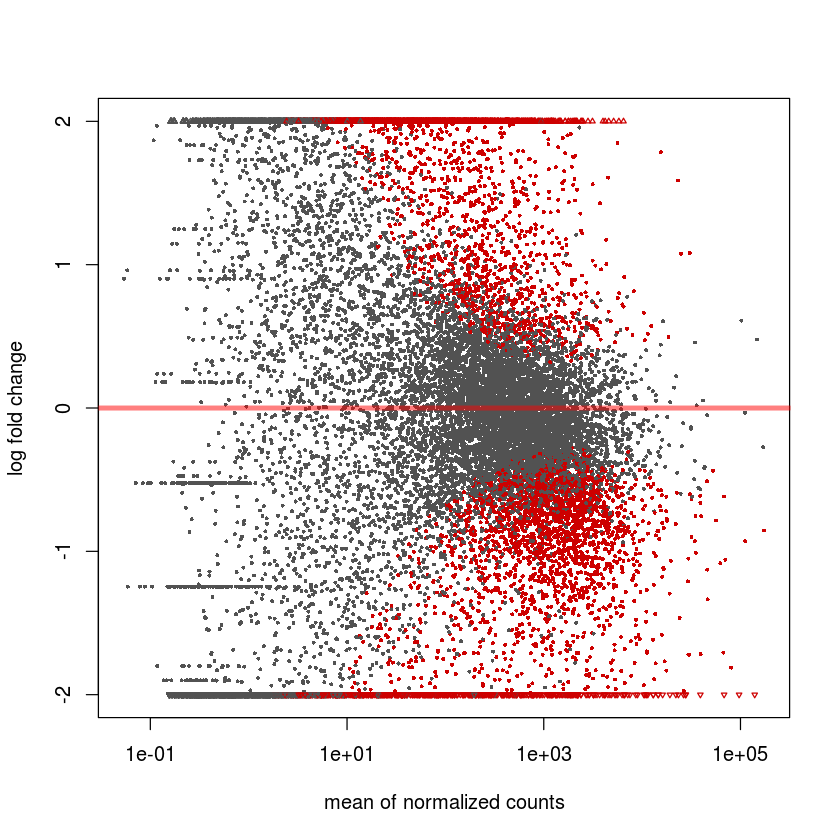

In [36]:
plotMA(res, ylim=c(-2,2))